# Telco Customer Churn Prediction

In [37]:
# Importing libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

## Get the data

In [2]:
data_path = "../artifacts/data"
files = os.listdir(data_path)
files
for file in files:
    if file != '~$Telco_customer_churn.xlsx':
        file_name = os.path.splitext(file)[0]
        globals()[f'{file_name}_df'] = pd.read_excel(os.path.join(data_path, file))

df_s = [
    
    Telco_customer_churn_df,

    Telco_customer_churn_demographics_df,

    Telco_customer_churn_location_df,
    
    Telco_customer_churn_population_df,
    
    Telco_customer_churn_services_df,
    
    Telco_customer_churn_services_df,
    
    CustomerChurn_df
]

## Data Analysis and EDA/Visualization

In [3]:
Telco_customer_churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
Telco_customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# Investigating all categorical values in the dataset
categorical_data = []
for column in Telco_customer_churn_df:
    value_counts = pd.value_counts(Telco_customer_churn_df[column])
    value_counts_len = len(value_counts.index.to_list())

    if value_counts_len < 10 and value_counts_len!=1:
        categorical_data.append(column)
        print(f"Unique values for column '{column}' : {value_counts.index.to_list()} having len {value_counts_len}")

Unique values for column 'Gender' : ['Male', 'Female'] having len 2
Unique values for column 'Senior Citizen' : ['No', 'Yes'] having len 2
Unique values for column 'Partner' : ['No', 'Yes'] having len 2
Unique values for column 'Dependents' : ['No', 'Yes'] having len 2
Unique values for column 'Phone Service' : ['Yes', 'No'] having len 2
Unique values for column 'Multiple Lines' : ['No', 'Yes', 'No phone service'] having len 3
Unique values for column 'Internet Service' : ['Fiber optic', 'DSL', 'No'] having len 3
Unique values for column 'Online Security' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Online Backup' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Device Protection' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Tech Support' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Streaming TV' : ['No', 'Yes', 'No internet service'] having len 3
Unique value

In [6]:
# Telco_customer_churn_df_copy = Telco_customer_churn_df.copy().fillna(''),
# Telco_customer_churn_demographics_df_copy = Telco_customer_churn_demographics_df.copy().fillna(''),
# Telco_customer_churn_location_df_copy = Telco_customer_churn_location_df.copy().fillna(''),
# Telco_customer_churn_population_df_copy = Telco_customer_churn_population_df.copy().fillna(''),
# Telco_customer_churn_services_df_copy = Telco_customer_churn_services_df.copy().fillna(''),
# Telco_customer_churn_services_df_copy = Telco_customer_churn_services_df.copy().fillna(''),

# df_s = [
#     Telco_customer_churn_df_copy,
#     Telco_customer_churn_demographics_df_copy,
#     Telco_customer_churn_location_df_copy,
#     Telco_customer_churn_population_df_copy,
#     Telco_customer_churn_services_df_copy,
#     Telco_customer_churn_services_df_copy
# ]
# os.makedirs("./df_info", exist_ok=True)
# count = 0
# for df in enumerate(df_s):
#     file_path = f'./df_info/{count}.txt'
#     count+=1
#     info_str = df.info(buf=None)
#     with open(file_path, "w") as f:
#         f.write(info_str)

In [7]:
# The 5 df's (subset of telco_churn) demographics/location etc. are to be dealt with.
categorical_data

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Value']

#### Categorical Data

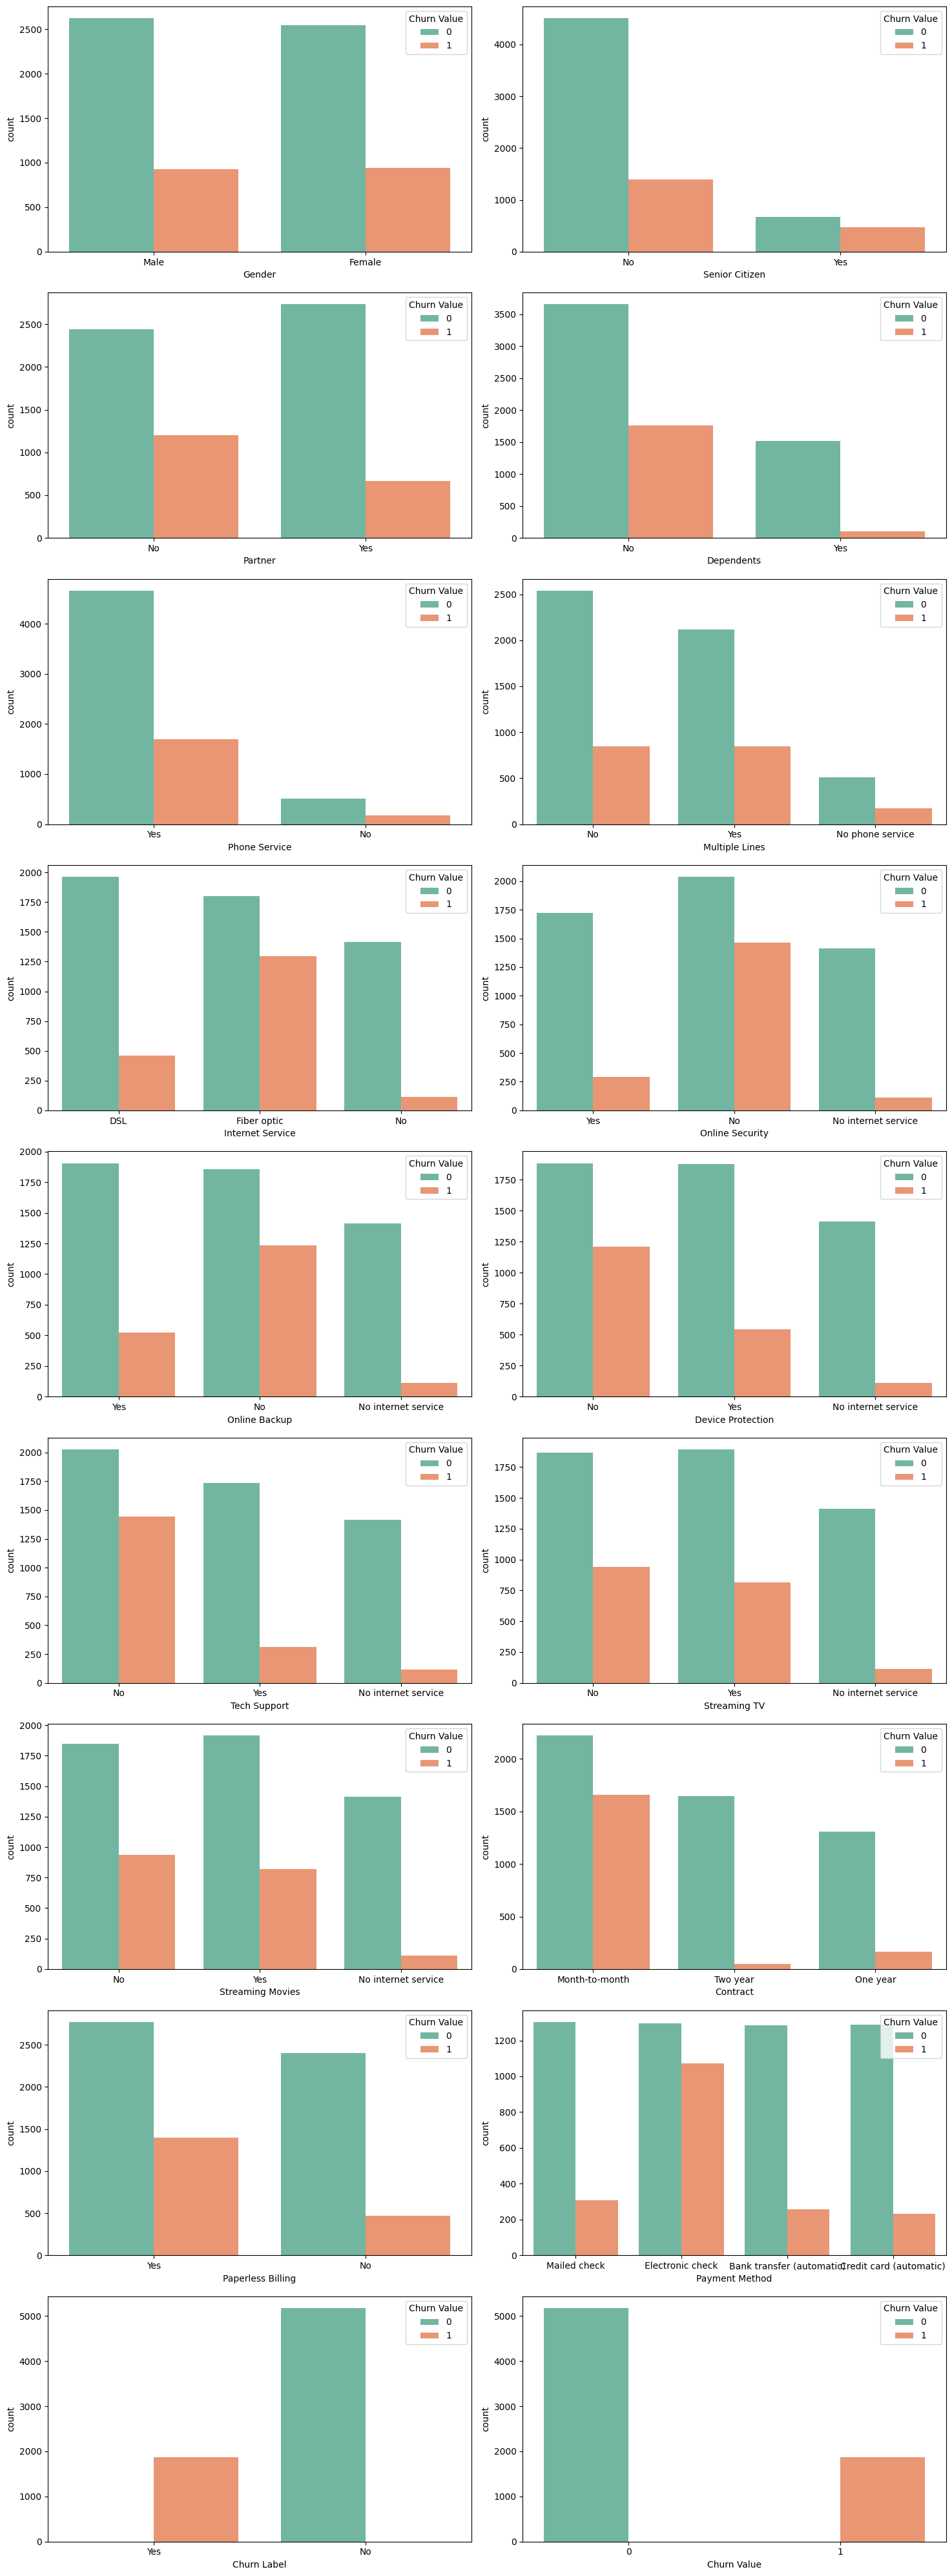

In [8]:
# Custom plot
fig, axes = plt.subplots(9,2, figsize=(15,40))
axes = axes.flatten()
for i in range(len(categorical_data)):
    features = categorical_data[i]
    sns.countplot(x=features, data=Telco_customer_churn_df, palette = 'Set2', ax=axes[i], hue='Churn Value')

plt.tight_layout()
plt.show()

#### Continous Data

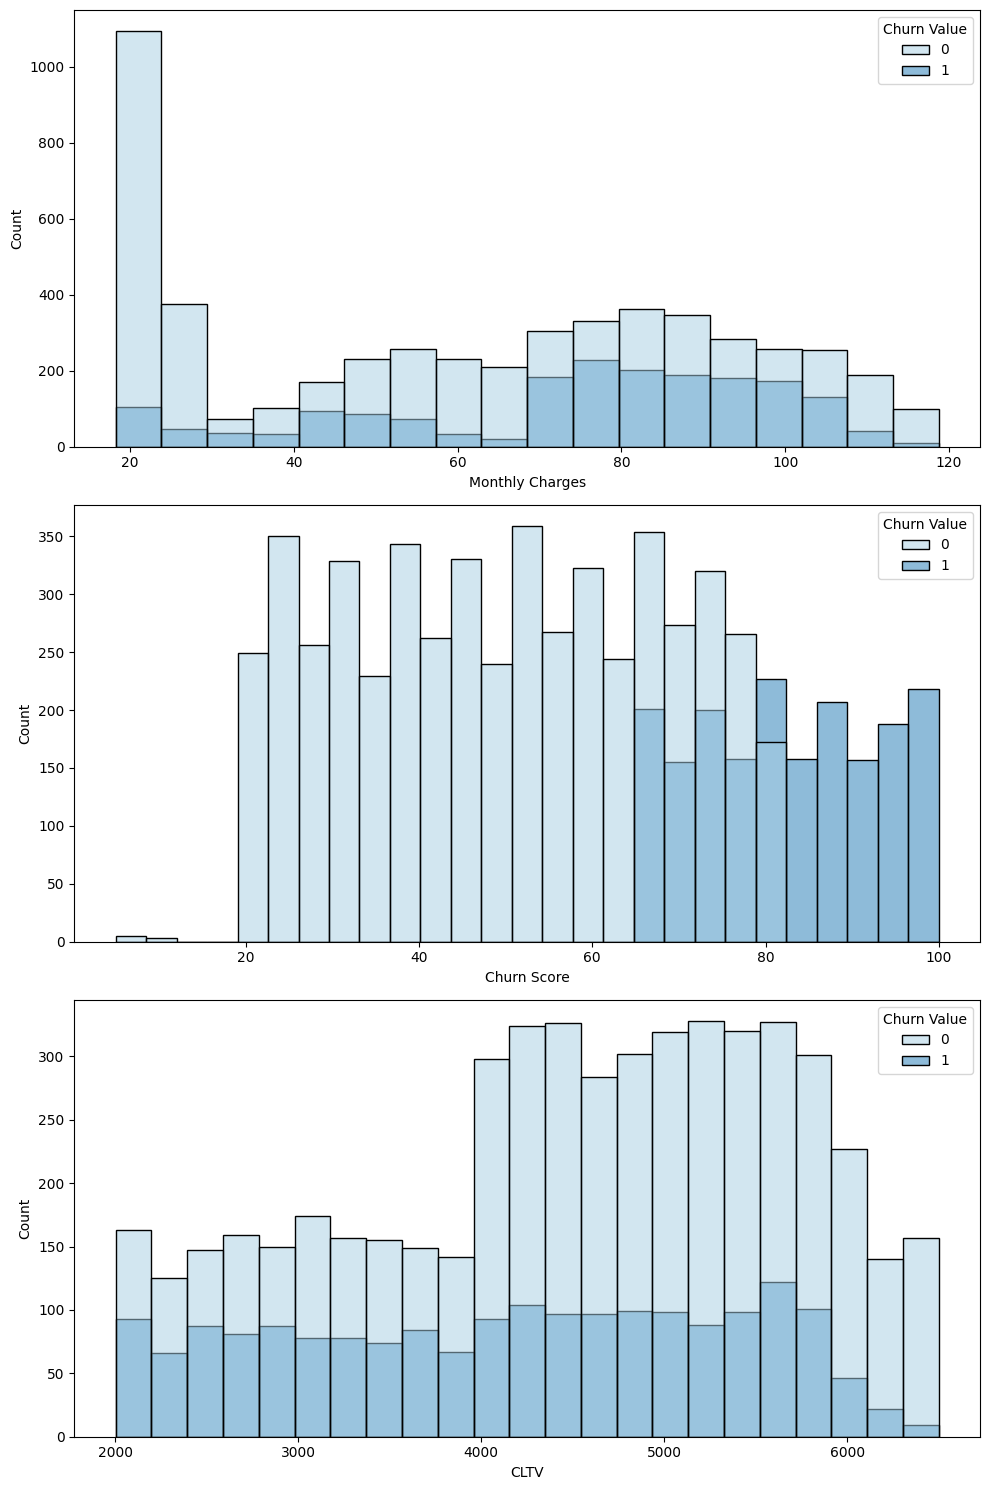

In [21]:
continous_data = ['Monthly Charges', 'Churn Score', 'CLTV']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_df, ax=axes[i], palette='Paired', hue='Churn Value')
plt.tight_layout()
plt.show()

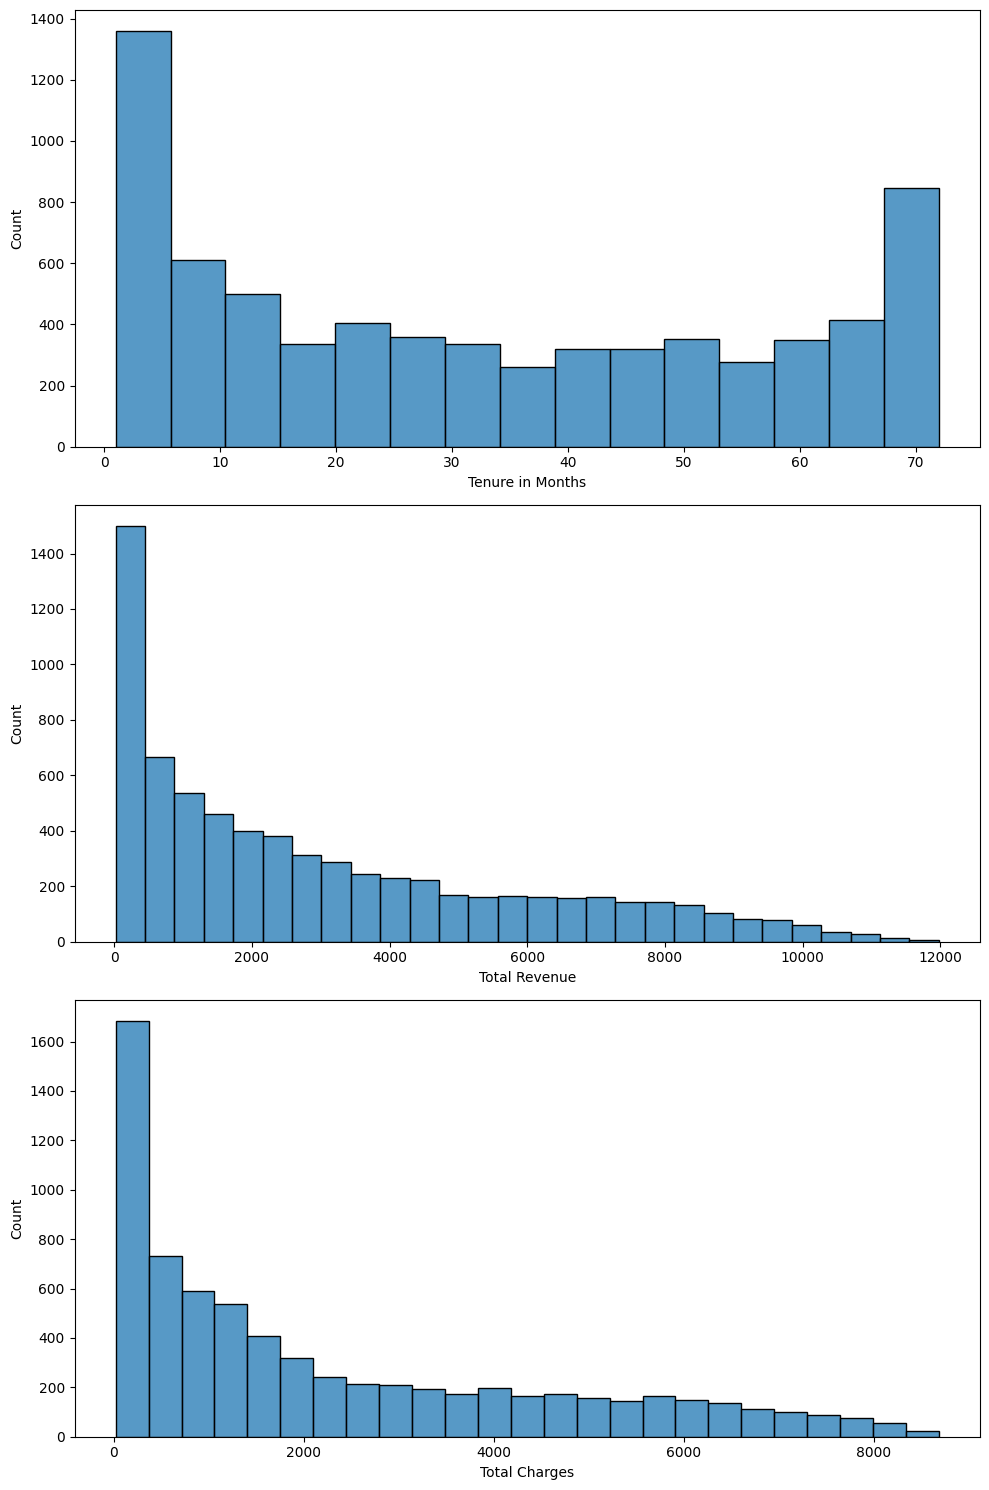

In [24]:
continous_data = ['Tenure in Months', 'Total Revenue', 'Total Charges']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_services_df, ax=axes[i])
plt.tight_layout()
plt.show()

#### Number of Dependents

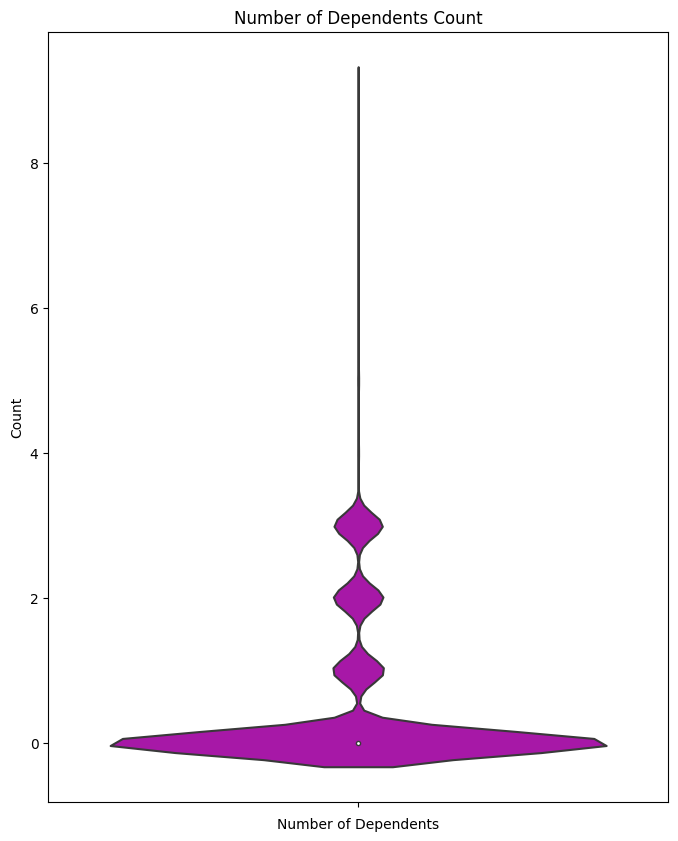

In [10]:
plt.figure(figsize=(8,10))
sns.violinplot(Telco_customer_churn_demographics_df, y='Number of Dependents', color='m')
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Number of Dependents Count")
plt.show()

In [17]:
# Distribution of People around the city.
fig = px.scatter_mapbox(
    Telco_customer_churn_df,
    lat = 'Latitude',
    lon = 'Longitude',
    color = 'Churn Score',
    hover_name = 'Churn Value',
    # size = 'Churn Value',
    zoom = 5, 
    height = 800,
    width = 800
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

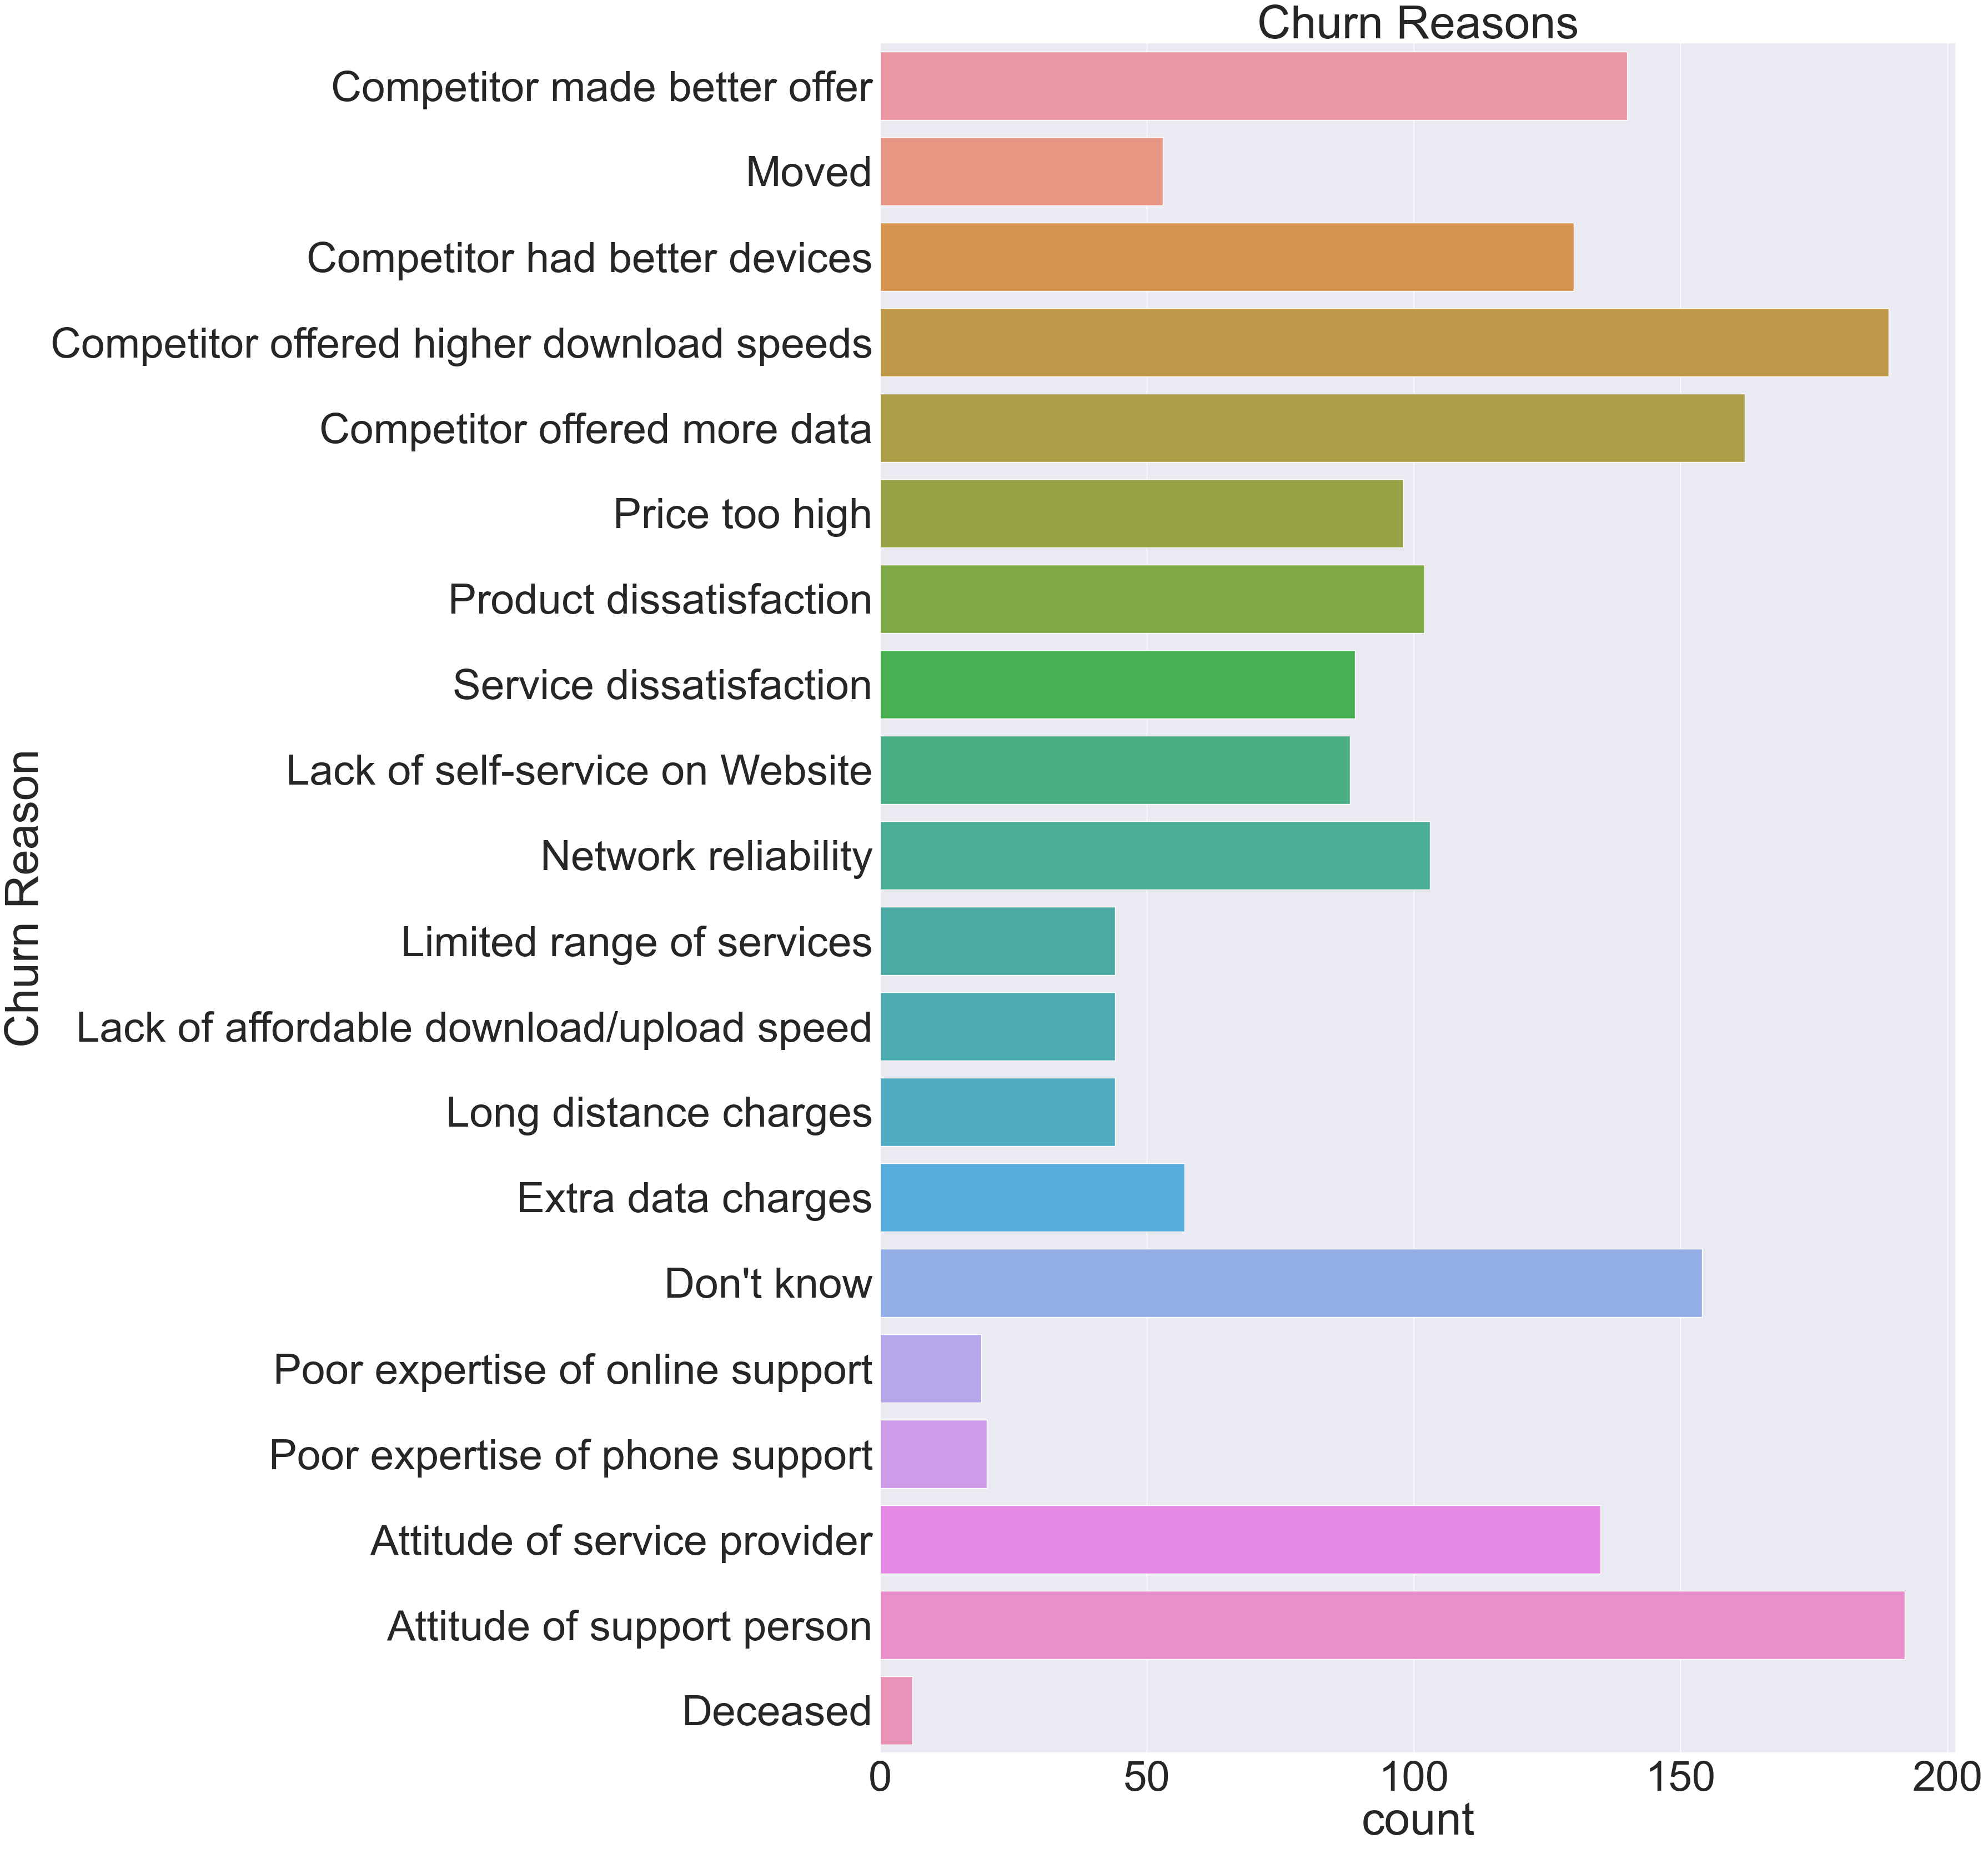

In [36]:
# Reason for churn -> most imp to analyze
plt.figure(figsize=(25,40))
sns.countplot(y='Churn Reason', data=Telco_customer_churn_df)
# plt.legend()
plt.title("Churn Reasons")
sns.set(font_scale=5)
# plt.tight_layout()
plt.show()

## Feature Engineering

In [42]:
# Categorical Data -> LabelEncoder()
df = Telco_customer_churn_df.copy()
label_encoder = LabelEncoder()
categorical_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
    'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method', 'Churn Value'
]

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
    print(col,' : ',df[col].unique(),' = ',label_encoder.inverse_transform(df[col].unique()))


Gender  :  [1 0]  =  ['Male' 'Female']
Senior Citizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [1 0]  =  ['Yes' 'No']
Multiple Lines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [3 2 0 1]  =  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Value  :  [1 0]  =  [1 0]


In [43]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,0,1,3,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,0,1,2,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,0,1,2,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,0,1,2,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,0,1,0,103.70,5036.3,Yes,1,89,5340,Competitor had better devices
